<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/bda_sem7_mp/bda_06_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K MEANS CLUSTERING USING MARKS DATASET OF YOUR CLASS**

**Name**: Sanjana Asrani

**Div**: D17B

**Roll no.** 01

**Subject:** BDA

# **THEORY:**

Certainly! Here's a brief overview of k-means clustering and the libraries used to implement it in PySpark.

**K-Means Clustering:**

K-Means clustering is a popular unsupervised machine learning algorithm used for data segmentation and clustering. The primary goal of k-means is to partition a dataset into clusters where each data point belongs to the cluster with the nearest mean (centroid). The algorithm follows these steps:

1. **Initialization**: Randomly select k initial cluster centroids. These centroids represent the initial cluster centers.

2. **Assignment**: Assign each data point to the nearest cluster centroid, forming k clusters.

3. **Update**: Recalculate the cluster centroids as the mean of the data points in each cluster.

4. **Repeat**: Repeat the assignment and update steps until convergence. Convergence is reached when the centroids no longer change significantly or after a fixed number of iterations.

5. **Result**: The final clusters are formed with the resulting centroids.

K-Means is widely used in various applications, including image compression, customer segmentation, and anomaly detection.

**Libraries and Tools Used in PySpark:**

1. **PySpark**: PySpark is the Python library for Apache Spark, a distributed data processing framework. It allows you to perform distributed data processing and analysis, including machine learning tasks like k-means clustering.

2. **pyspark.sql.SparkSession**: SparkSession is the entry point to using PySpark. It allows you to create DataFrames, load data, and perform distributed data processing.

3. **pyspark.ml.feature.VectorAssembler**: VectorAssembler is used to assemble multiple input columns into a single vector column, which is often required for machine learning tasks.

4. **pyspark.ml.clustering.KMeans**: The KMeans class in PySpark's machine learning library provides an implementation of the k-means clustering algorithm. It allows you to specify the number of clusters (k) and other parameters.

5. **matplotlib**: The matplotlib library is widely used for creating data visualizations, including scatter plots and drawing circles to visualize k-means clustering results.

In the code you provided, you used PySpark for data manipulation and k-means clustering, and matplotlib for data visualization. PySpark is especially useful when dealing with large datasets that need to be distributed across a cluster of machines for processing.

K-Means clustering can help discover hidden patterns and group similar data points, making it a valuable tool in data analysis and machine learning.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=25157a5f170d96f4ed24c0b83bcd38604b963bd16d64fc359d493299ba1edf54
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()


In [ ]:
import random
import pandas as pd

# Create a list of random names
def generate_random_name():
    first_names = ["Alice", "Bob", "Charlie", "David", "Emma", "Fiona", "Grace", "Harry", "Ivy", "Jack"]
    last_names = ["Smith", "Johnson", "Brown", "Wilson", "Lee", "Davis", "Evans", "Clark", "Harris", "Turner"]
    return f"{random.choice(first_names)} {random.choice(last_names)}"

# Generate random marks for each subject
def generate_random_marks():
    return {
        "bda": random.randint(0, 100),
        "nlp": random.randint(0, 100),
        "ml": random.randint(0, 100),
        "mis": random.randint(0, 100),
        "bc": random.randint(0, 100)
    }

# Create a list of dictionaries representing individuals
num_people = 50  # Adjust this to the desired number of people in your dataset
people_data = []
for _ in range(num_people):
    person = {
        "Name": generate_random_name(),
        **generate_random_marks()
    }
    people_data.append(person)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(people_data)

# Save the DataFrame to a CSV file
df.to_csv("friends_marks.csv", index=False)


In [ ]:
df.head(5)

,Name,bda,nlp,ml,mis,bc
0,Jack Turner,69,81,69,40,16
1,Alice Harris,6,47,61,3,14
2,Grace Smith,0,27,38,34,54
3,Jack Evans,38,55,90,87,14
4,Harry Wilson,83,93,15,53,33


In [ ]:
# Load the data
data = spark.read.csv("friends_marks.csv", header=True, inferSchema=True)

# Calculate 'a%' based on marks in each subject
data = data.withColumn("a%", (data["bda"] + data["nlp"] + data["ml"] + data["mis"] + data["bc"]) / 5)

# Select only the relevant columns for clustering
feature_columns = ["a%"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)


In [ ]:
# Train the K-Means model
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(data)

# Make predictions
predictions = model.transform(data)


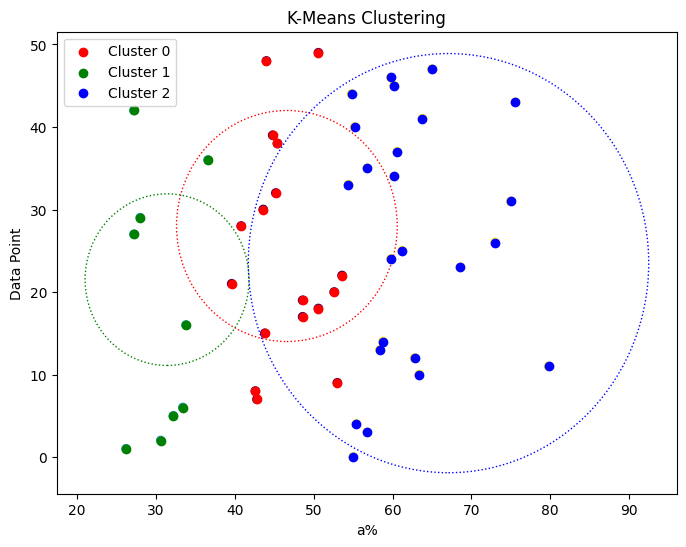

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract cluster centers and convert to a NumPy array
centers = np.array(model.clusterCenters())

# Get the cluster assignments for each data point
cluster_assignments = predictions.select("prediction").rdd.map(lambda x: x[0]).collect()

# Create a list of colors for each cluster
colors = ['r', 'g', 'b']  # You can add more colors if needed

# Convert the list of 'a%' values to a NumPy array
a_percent_values = np.array(predictions.select("a%").rdd.map(lambda x: x[0]).collect())

# Plot the data points based on 'a%'
plt.figure(figsize=(8, 6))
plt.scatter(a_percent_values, range(len(cluster_assignments)), c=cluster_assignments, cmap='viridis')

# Draw a circle around the points in each cluster
for cluster_id in range(3):  # Assuming you have 3 clusters
    cluster_points = np.array([i for i, cluster in enumerate(cluster_assignments) if cluster == cluster_id])
    plt.scatter(a_percent_values[cluster_points], cluster_points, c=colors[cluster_id], marker='o', label=f'Cluster {cluster_id}')

    # Calculate the bounding box (rectangle) for the cluster
    min_x = min(a_percent_values[cluster_points])
    max_x = max(a_percent_values[cluster_points])
    min_y = min(cluster_points)
    max_y = max(cluster_points)

    # Calculate the center and radius for the circle
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    radius = max_x - min_x  # Adjust the radius as needed

    # Draw a circle around the cluster
    circle = plt.Circle((center_x, center_y), radius, color=colors[cluster_id], fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

plt.xlabel("a%")
plt.ylabel("Data Point")
plt.title("K-Means Clustering")
plt.legend()
plt.show()
